In [1]:
#importing neccessary libraries
import numpy as np
import pandas as pd

#libraries used for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#libraries used for depressing the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ECG_training.csv')

In [3]:
df.head()

,ECG,Classification
0,"-127,-162,-197,-229,-245,-254,-261,-265,-268,-...",N
1,"128,157,189,226,250,257,262,265,268,269,268,26...",N
2,"519,619,723,827,914,956,955,934,920,900,889,88...",A
3,"-266,-316,-367,-407,-423,-423,-401,-367,-329,-...",N
4,"21,22,24,26,28,31,32,34,34,35,35,34,34,34,35,3...",N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ECG             3500 non-null   object
 1   Classification  3500 non-null   object
dtypes: object(2)
memory usage: 54.8+ KB


In [5]:
df.describe()

,ECG,Classification
count,3500,3500
unique,3498,2
top,"-21,-23,-28,-44,-61,-72,-81,-87,-92,-96,-99,-1...",N
freq,2,3089


In [6]:
temp = df.groupby('Classification').count()['ECG'].reset_index().sort_values(by='ECG',ascending=False)
temp.style.background_gradient(cmap='Purples')

,Classification,ECG
1,N,3089
0,A,411


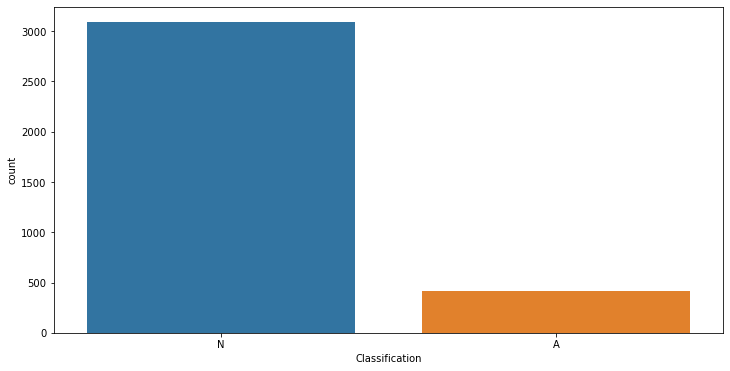

In [7]:
plt.figure(figsize=(12,6))
sns.countplot(x='Classification',data=df)
plt.show()

In [8]:
df['ECG'][0]

'-127,-162,-197,-229,-245,-254,-261,-265,-268,-268,-267,-265,-263,-260,-256,-253,-249,-247,-245,-243,-241,-238,-236,-234,-232,-231,-230,-229,-229,-229,-229,-230,-230,-230,-229,-229,-227,-225,-221,-218,-215,-213,-213,-213,-212,-211,-210,-209,-206,-203,-201,-198,-198,-200,-204,-210,-216,-224,-233,-243,-253,-262,-270,-275,-281,-286,-291,-292,-289,-282,-273,-264,-259,-255,-250,-246,-241,-237,-233,-229,-226,-222,-219,-216,-213,-209,-204,-195,-187,-179,-172,-169,-166,-164,-161,-159,-157,-156,-154,-153,-153,-154,-155,-157,-159,-160,-162,-164,-166,-167,-169,-170,-171,-174,-177,-177,-171,-158,-121,-66,11,109,219,331,434,519,575,593,578,533,440,329,213,99,-3,-88,-153,-189,-210,-222,-230,-237,-243,-248,-253,-256,-260,-263,-266,-267,-266,-264,-259,-254,-249,-244,-238,-231,-224,-216,-207,-199,-191,-183,-176,-170,-164,-159,-155,-150,-143,-137,-129,-122,-114,-104,-92,-77,-64,-52,-39,-27,-14,-1,9,18,26,34,42,49,53,56,58,61,64,67,70,72,73,73,73,72,71,69,66,62,58,53,49,45,39,30,21,14,7,0,-7,-13,-14,-10,

In [9]:
df['New_ECG']=df['ECG'].apply(lambda x: list(map(int, x.split(","))))

In [10]:
print(df['New_ECG'][0])

[-127, -162, -197, -229, -245, -254, -261, -265, -268, -268, -267, -265, -263, -260, -256, -253, -249, -247, -245, -243, -241, -238, -236, -234, -232, -231, -230, -229, -229, -229, -229, -230, -230, -230, -229, -229, -227, -225, -221, -218, -215, -213, -213, -213, -212, -211, -210, -209, -206, -203, -201, -198, -198, -200, -204, -210, -216, -224, -233, -243, -253, -262, -270, -275, -281, -286, -291, -292, -289, -282, -273, -264, -259, -255, -250, -246, -241, -237, -233, -229, -226, -222, -219, -216, -213, -209, -204, -195, -187, -179, -172, -169, -166, -164, -161, -159, -157, -156, -154, -153, -153, -154, -155, -157, -159, -160, -162, -164, -166, -167, -169, -170, -171, -174, -177, -177, -171, -158, -121, -66, 11, 109, 219, 331, 434, 519, 575, 593, 578, 533, 440, 329, 213, 99, -3, -88, -153, -189, -210, -222, -230, -237, -243, -248, -253, -256, -260, -263, -266, -267, -266, -264, -259, -254, -249, -244, -238, -231, -224, -216, -207, -199, -191, -183, -176, -170, -164, -159, -155, -150,

# Building Features

In [11]:
import heartpy as hp
working_data, features = hp.process(df['New_ECG'][0], sample_rate=300.0, calc_freq=True)

In [12]:
features

{'bpm': 78.77461706783369,
 'ibi': 761.6666666666667,
 'sdnn': 61.300477469687756,
 'sdsd': 83.71856417292621,
 'rmssd': 93.85792086611183,
 'pnn20': 0.4594594594594595,
 'pnn50': 0.10810810810810811,
 'hr_mad': 28.333333333333428,
 'sd1': 66.36509585293453,
 'sd2': 57.02489215080812,
 's': 11889.239379158029,
 'sd1/sd2': 1.1637916942907194,
 'breathingrate': 0.2419633598340823,
 'vlf': 0.0,
 'lf': 128.76859464878652,
 'hf': 660.8352937827539,
 'lf/hf': 0.19485732051581148,
 'p_total': 789.6038884315403,
 'vlf_perc': 0.0,
 'lf_perc': 16.307999053116482,
 'hf_perc': 83.69200094688352,
 'lf_nu': 16.307999053116482,
 'hf_nu': 83.69200094688352}

In [13]:
keys = list(features.keys())

In [14]:
df1 = pd.DataFrame(features,index=[0])

In [15]:
df1

,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,...,vlf,lf,hf,lf/hf,p_total,vlf_perc,lf_perc,hf_perc,lf_nu,hf_nu
0,78.774617,761.666667,61.300477,83.718564,93.857921,0.459459,0.108108,28.333333,66.365096,57.024892,...,0.0,128.768595,660.835294,0.194857,789.603888,0.0,16.307999,83.692001,16.307999,83.692001


In [16]:
len(df["New_ECG"])

3500

In [17]:
for i in range(1,3499,1):
    try:
        working_data, features = hp.process(df["New_ECG"][i], sample_rate=300.0, calc_freq=True)
        df1 = df1.append(features,ignore_index=True)
    except:
        continue

In [18]:
df1

,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,...,vlf,lf,hf,lf/hf,p_total,vlf_perc,lf_perc,hf_perc,lf_nu,hf_nu
0,78.774617,761.666667,61.300477,83.718564,93.857921,0.459459,0.108108,28.333333,66.365096,57.024892,...,0.0,128.768595,660.835294,0.194857,789.603888,0.0,16.307999,83.692001,16.307999,83.692001
1,363.636364,165.000000,114.646801,102.282345,155.512466,0.857143,0.714286,66.666667,106.441088,110.212637,...,0.0,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
2,64.425412,931.309524,169.711097,133.625235,219.979603,0.923077,0.807692,135.000000,155.330156,183.697974,...,0.0,1484.438859,19592.960888,0.075764,21077.399747,0.0,7.042799,92.957201,7.042799,92.957201
3,151.840491,395.151515,179.203421,142.993395,360.872400,1.000000,1.000000,140.000000,254.442310,130.290274,...,0.0,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
4,62.666821,957.444444,51.766451,20.782041,29.980837,0.413793,0.103448,45.000000,20.973468,69.332834,...,0.0,1105.717794,130.805014,8.453176,1236.522808,0.0,89.421545,10.578455,89.421545,10.578455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475,211.699164,283.421053,154.345414,117.958683,216.034215,0.962963,0.888889,100.000000,151.363613,141.880430,...,0.0,0.000000,1934.642028,0.000000,1934.642028,0.0,0.000000,100.000000,0.000000,100.000000
3476,100.352113,597.894737,131.390274,142.412243,185.017517,0.733333,0.400000,43.333333,130.648454,137.846511,...,0.0,1672.708478,1830.975618,0.913561,3503.684096,0.0,47.741418,52.258582,47.741418,52.258582
3477,151.431441,396.218905,142.636738,27.960504,277.541046,1.000000,1.000000,30.000000,196.212843,48.645606,...,0.0,52.993975,342.129606,0.154894,395.123581,0.0,13.412000,86.588000,13.412000,86.588000
3478,192.051214,312.416667,205.838377,174.553001,326.424230,0.964286,0.892857,191.666667,229.513235,150.216091,...,0.0,0.000000,9961.307732,0.000000,9961.307732,0.0,0.000000,100.000000,0.000000,100.000000


In [20]:
df1.head()

,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,...,vlf,lf,hf,lf/hf,p_total,vlf_perc,lf_perc,hf_perc,lf_nu,hf_nu
0,78.774617,761.666667,61.300477,83.718564,93.857921,0.459459,0.108108,28.333333,66.365096,57.024892,...,0.0,128.768595,660.835294,0.194857,789.603888,0.0,16.307999,83.692001,16.307999,83.692001
1,363.636364,165.000000,114.646801,102.282345,155.512466,0.857143,0.714286,66.666667,106.441088,110.212637,...,0.0,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
2,64.425412,931.309524,169.711097,133.625235,219.979603,0.923077,0.807692,135.000000,155.330156,183.697974,...,0.0,1484.438859,19592.960888,0.075764,21077.399747,0.0,7.042799,92.957201,7.042799,92.957201
3,151.840491,395.151515,179.203421,142.993395,360.872400,1.000000,1.000000,140.000000,254.442310,130.290274,...,0.0,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
4,62.666821,957.444444,51.766451,20.782041,29.980837,0.413793,0.103448,45.000000,20.973468,69.332834,...,0.0,1105.717794,130.805014,8.453176,1236.522808,0.0,89.421545,10.578455,89.421545,10.578455


In [21]:
df1["Classification"] = df["Classification"]

In [22]:
df1.shape

(3480, 24)

In [23]:
df1.to_csv("Dataset.csv")